In [133]:
import pandas as pd

In [134]:
import numpy as np

In [135]:
import matplotlib.pyplot as plt

In [136]:
import seaborn as sns

In [137]:
import os

In [138]:
%matplotlib inline

In [362]:
os.chdir("E:\\PYTHON NOTES\\projects\\hakerthon\\loan predition")

In [495]:
dataset_train=pd.read_csv("train_1.csv")

In [496]:
dataset_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [497]:
dataset_test=pd.read_csv("test_2.csv")

In [498]:
dataset_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [499]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [500]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [501]:
dataset_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [502]:
dataset_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [503]:
dataset_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [504]:
dataset_train.apply(lambda x : sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [505]:
# fig,ax=plt.subplots(figsize=(30,30))
# sns.heatmap(dataset_train.isnull(),annot=True, linewidths=1, ax=ax)



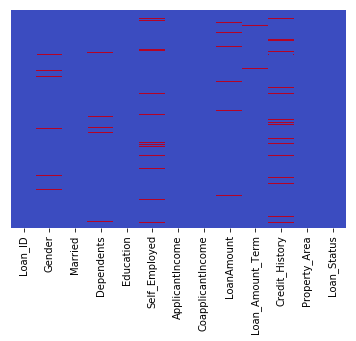

In [506]:
sns.heatmap(dataset_train.isnull(),yticklabels= False,cbar=False , cmap="coolwarm",)

In [507]:
dataset_train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [508]:
dataset_test["Gender"].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [509]:
dataset_train["Gender"]=dataset_train["Gender"].fillna(dataset_train["Gender"].mode()[0])

In [510]:
dataset_test["Gender"]=dataset_test["Gender"].fillna(dataset_test["Gender"].mode()[0])

In [511]:
dataset_train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [512]:
dataset_train["Married"]=dataset_train["Married"].fillna("Yes")

In [513]:
dataset_test["Married"]=dataset_test["Married"].fillna("Yes")

In [514]:
dataset_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [515]:
dataset_train["Dependents"]=dataset_train["Dependents"].fillna("0")

In [516]:
dataset_test["Dependents"]=dataset_test["Dependents"].fillna("0")

In [517]:
dataset_train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [518]:
dataset_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [519]:
dataset_train["Self_Employed"]=dataset_train["Self_Employed"].fillna("No")

In [520]:
dataset_test["Self_Employed"]=dataset_test["Self_Employed"].fillna("No")

In [521]:
dataset_train["LoanAmount"]=dataset_train["LoanAmount"].fillna(dataset_train["LoanAmount"].mean())

In [522]:
dataset_test["LoanAmount"]=dataset_test["LoanAmount"].fillna(dataset_test["LoanAmount"].mean())

In [523]:
dataset_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [524]:
dataset_train.Loan_Amount_Term = dataset_train.Loan_Amount_Term.fillna(360.0)

In [525]:
dataset_test.Loan_Amount_Term = dataset_test.Loan_Amount_Term.fillna(360.0)

In [526]:
dataset_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [527]:
dataset_train["Credit_History"]=dataset_train["Credit_History"].fillna("1.0")

In [528]:
dataset_test["Credit_History"]=dataset_test["Credit_History"].fillna("1.0")

In [529]:
dataset_test.apply(lambda x  : x.isnull().sum(),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [530]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


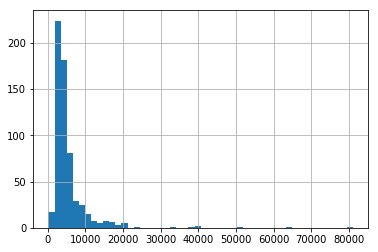

In [531]:
dataset_train["ApplicantIncome"].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


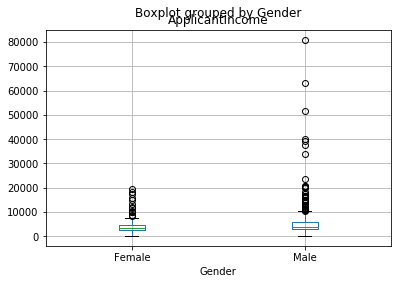

In [532]:
dataset_train.boxplot(column=["ApplicantIncome"],by="Gender")

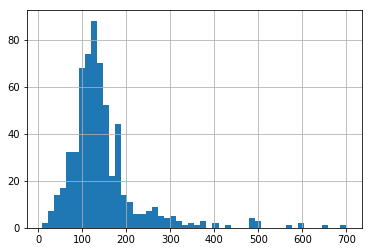

In [533]:
dataset_train["LoanAmount"].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


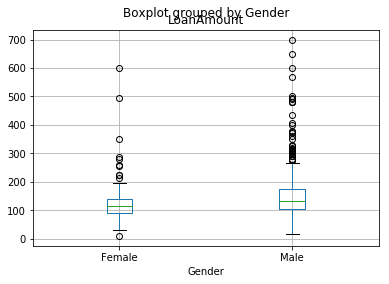

In [534]:
dataset_train.boxplot(column="LoanAmount",by="Gender")

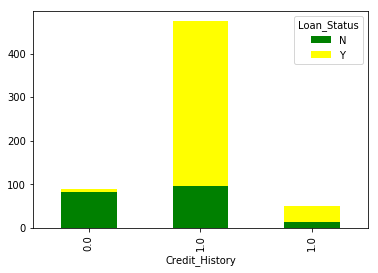

In [535]:
#stacked chard
stack_chart=pd.crosstab(dataset_train["Credit_History"],dataset_train["Loan_Status"])
stack_chart.plot(kind="bar",stacked=True,color=["green","yellow"],grid=False)

In [536]:
x_train=dataset_train.iloc[:,:12]

In [537]:
y_train=dataset_train.iloc[:,12]

In [538]:
targets = dataset_train['Loan_Status'].map({'Y':1,'N':0})

In [539]:
y=targets

In [540]:
def outlier_detect(df):
    for i in df.describe().columns:
        q1=df.describe().at["25%",i]
        q3=df.describe().at["75%",i]
        IQR=(q3-q1)
        ltv=(q1-1.5*IQR)
        utv=(q3+1.5*IQR)
        x=np.array(df[i])
        p=[]
        for j in x:
            if j<ltv:
                p.append(ltv)
            elif j>utv:
                p.append(utv)
            else:
                p.append(j)
        df[i]=p
    return(df)
                
        

In [541]:
dataset_test1=dataset_test.drop("Loan_ID",axis=1)

In [542]:
dataset_test3=outlier_detect(dataset_test1)

In [543]:
dataset1=outlier_detect(x_train)

In [544]:
x_train=dataset1

In [545]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [546]:
# dataset_int=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [547]:
# dataset_obj=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]

In [548]:
from scipy.stats import chi2_contingency

In [549]:
# for i in dataset_obj:
#     print(i)
#     chi2,p,dof,ex=chi2_contingency(pd.crosstab(dataset_train["Loan_Status"],dataset_train[i]))
#     print(p)

In [550]:
temp=pd.get_dummies(x_train["Gender"],prefix="Gender")
x_train=x_train.join(temp)


In [551]:
temp=pd.get_dummies(dataset_test3["Gender"],prefix="Gender")
dataset_test3=dataset_test3.join(temp)

In [552]:
x_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [553]:
temp=pd.get_dummies(x_train["Married"],prefix="Married")
x_train=x_train.join(temp)


In [554]:
temp=pd.get_dummies(dataset_test3["Married"],prefix="Married")
dataset_test3=dataset_test3.join(temp)

In [555]:
temp=pd.get_dummies(x_train["Dependents"],prefix="Dependents")
x_train=x_train.join(temp)


In [556]:
temp=pd.get_dummies(dataset_test3["Dependents"],prefix="Dependents")
dataset_test3=dataset_test3.join(temp)

In [557]:
temp=pd.get_dummies(x_train["Education"],prefix="Education")
x_train=x_train.join(temp)

In [558]:
temp=pd.get_dummies(dataset_test3["Education"],prefix="Education")
dataset_test3=dataset_test3.join(temp)

In [559]:
temp=pd.get_dummies(x_train["Self_Employed"],prefix="Self_Employed")
x_train=x_train.join(temp)

In [560]:
temp=pd.get_dummies(dataset_test3["Self_Employed"],prefix="Self_Employed")
dataset_test3=dataset_test3.join(temp)

In [561]:
temp=pd.get_dummies(x_train["Credit_History"],prefix="Credit_History")
x_train=x_train.join(temp)

In [562]:
temp=pd.get_dummies(dataset_test3["Credit_History"],prefix="Credit_History")
dataset_test3=dataset_test3.join(temp)

In [563]:
temp=pd.get_dummies(x_train["Property_Area"],prefix="Property_Area")
x_train=x_train.join(temp)

In [564]:
temp=pd.get_dummies(dataset_test3["Property_Area"],prefix="Property_Area")
dataset_test3=dataset_test3.join(temp)

In [565]:
x_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Credit_History_0.0', 'Credit_History_1.0', 'Credit_History_1.0',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [566]:
dataset_test4=dataset_test3.drop(["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"],axis=1)

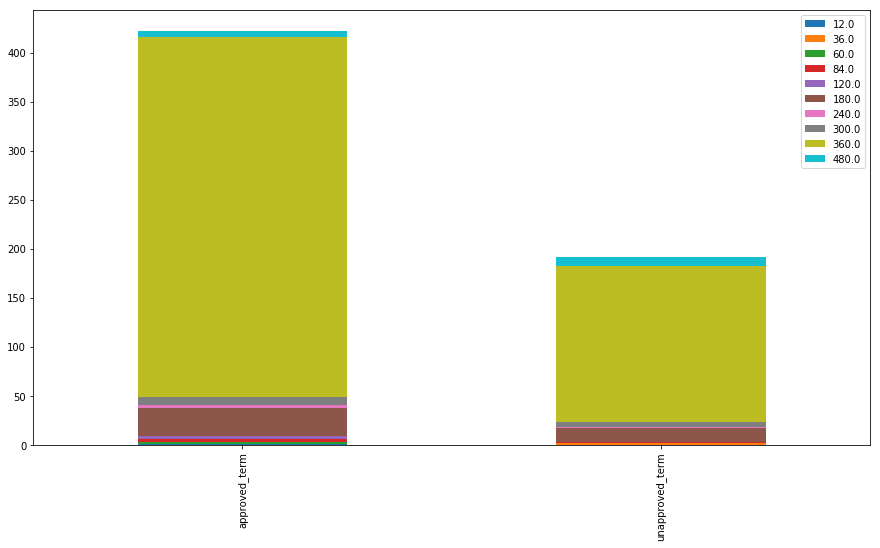

In [567]:
approved_term=dataset_train[dataset_train["Loan_Status"]=="Y"]["Loan_Amount_Term"].value_counts()
unapproved_term=dataset_train[dataset_train["Loan_Status"]=="N"]["Loan_Amount_Term"].value_counts()
df=pd.DataFrame([approved_term,unapproved_term])
df.index=["approved_term","unapproved_term"]
df.plot(kind="bar",stacked=True,figsize=(15,8))

In [568]:
dataset_test4.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [569]:
x_train1=x_train.drop(["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_ID"],axis=1)

In [570]:
x=x_train1

In [571]:
from sklearn.model_selection import train_test_split

In [572]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [573]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [574]:
from sklearn.linear_model import LogisticRegression 

In [575]:
lg=LogisticRegression()

In [576]:
Y_train.shape

(460,)

In [577]:
lg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [578]:
y_pred=lg.predict(X_test)

In [579]:
X_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [580]:
dataset_test4.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [581]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [582]:
from sklearn import metrics

In [583]:
from sklearn.metrics import confusion_matrix

In [584]:
cm=confusion_matrix(Y_test,y_pred)

In [585]:
cm

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [586]:
from sklearn.metrics import roc_curve


In [587]:
from sklearn.metrics import auc

In [588]:
false_positive_rate,true_positive_rate,thershold=roc_curve(Y_test,y_pred)

In [589]:
auc(false_positive_rate,true_positive_rate)

0.7235491305258748

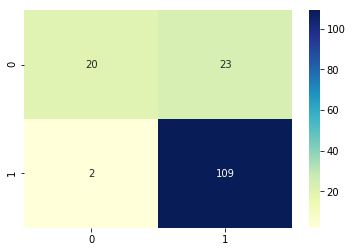

In [590]:
sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt="g")

In [591]:
metrics.accuracy_score(y_pred,Y_test)

0.8376623376623377

In [592]:
precision=metrics.precision_score(Y_test,y_pred)
precision

0.8257575757575758

In [593]:
recall=metrics.recall_score(Y_test,y_pred)
recall

0.9819819819819819

In [594]:
from sklearn.metrics import f1_score

In [595]:
f1_score = 2*(recall+precision)/(recall*precision)

In [596]:
f1_score

4.458715596330276

### apply random forest 

In [597]:
from sklearn.ensemble import RandomForestClassifier

In [598]:
rfc=RandomForestClassifier(n_estimators=30)

In [599]:
rfc_fit=rfc.fit(X_train,Y_train)

In [600]:
rfc_pred_test=rfc_fit.predict(X_test)

In [601]:
accuracy_r=metrics.accuracy_score(Y_test,rfc_pred_test)
accuracy_r

0.7987012987012987

In [602]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,rfc_pred_test)
auc(false_positive_rate, true_positive_rate)


0.7036455059710873

In [603]:
metrics.accuracy_score(rfc_pred_test,Y_test)

0.7987012987012987

In [604]:
precision=metrics.precision_score(Y_test,rfc_pred_test)
precision

0.8225806451612904

In [605]:
recall=metrics.recall_score(Y_test,rfc_pred_test)
recall

0.918918918918919

In [606]:
f1_score = 2*(recall+precision)/(recall*precision)
f1_score

4.607843137254902

In [607]:
from scipy.stats import randint 

In [608]:
from sklearn.model_selection import RandomizedSearchCV

In [609]:
params_RF_RS = {"max_depth": randint(3,8),
"max_features":['auto', 'sqrt', 'log2'], "min_samples_split":randint (2,10),
"min_samples_leaf":randint (1,10),
"criterion": ["gini", "entropy"]}

In [610]:
rf_rs=RandomizedSearchCV(RandomForestClassifier(),param_distributions=params_RF_RS,n_iter=100)

In [611]:
rf_rs.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000000306156D8>, 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000030615588>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000030488F98>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs',

In [612]:
model=rf_rs.best_params_

In [613]:
y_pred_rf=rf_rs.predict(X_test)

In [614]:
metrics.accuracy_score(y_pred_rf,Y_test)

0.8311688311688312

In [615]:
print("random forest accuracy:", metrics.accuracy_score(y_pred_rf,Y_test))

random forest accuracy: 0.8311688311688312


In [616]:
precision=metrics.precision_score(Y_test,y_pred_rf)
precision

0.8195488721804511

In [617]:
recall=metrics.recall_score(Y_test,y_pred_rf)
recall

0.9819819819819819

In [618]:
f1_score = 2*(recall+precision)/(recall*precision)
f1_score

4.477064220183486

In [619]:
dataset_test4.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [620]:
X_train.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [621]:
y_pred1=rf_rs.predict(dataset_test4)

In [254]:
y_pred1.shape

(367,)

In [623]:
dataset_test4["Loan_Status"]=y_pred1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [624]:
dataset_test4

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5720.0,0.0,110.0,360.0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,1
1,3076.0,1500.0,126.0,360.0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,1
2,5000.0,1800.0,208.0,360.0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
3,2340.0,2546.0,100.0,360.0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
4,3276.0,0.0,78.0,360.0,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
363,4158.0,709.0,115.0,360.0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,1
364,3250.0,1993.0,126.0,360.0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
365,5000.0,2393.0,158.0,360.0,0,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1


In [625]:
loan_id=dataset_test["Loan_ID"]

In [626]:
dataset_test4["Loan_ID"]=loan_id

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [627]:
dataset_test4

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Loan_ID
0,5720.0,0.0,110.0,360.0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,1,1,LP001015
1,3076.0,1500.0,126.0,360.0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,LP001022
2,5000.0,1800.0,208.0,360.0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,1,LP001031
3,2340.0,2546.0,100.0,360.0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,LP001035
4,3276.0,0.0,78.0,360.0,0,1,1,0,1,0,...,1,0,0,1,0,0,0,1,1,LP001051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,LP002971
363,4158.0,709.0,115.0,360.0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,1,1,LP002975
364,3250.0,1993.0,126.0,360.0,0,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,LP002980
365,5000.0,2393.0,158.0,360.0,0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,1,LP002986


In [628]:
df=pd.DataFrame()

In [629]:
df["Loan_ID"]=dataset_test["Loan_ID"]

In [630]:
df["Loan_Status"]=np.vectorize(lambda s : "Y" if s==1 else "N")(y_pred1)

In [631]:
df[["Loan_Status","Loan_ID"]].to_csv("output1.csv",index=False)

In [632]:
print("random forest accuracy:", metrics.accuracy_score(y_pred_rf,Y_test))

random forest accuracy: 0.8311688311688312
